<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям
*Идеальный просмотр Jupyter notebooks возможен только локально, GitHub и nbviewer могут неправильно отбражать формулы или картинки.*

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1KbWiGlupiSwYlqc8nmV6KjB3vNTI0C5hxZ6Tq3ZU4QA).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [3]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')

Посмотрим на первые 5 записей.

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше (здесь и далее под средним понимается среднее арифметическое).**

**<font color='red'>Варианты:</font>**
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин

In [9]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [11]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем реже указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- мужчины 
- женщины

In [12]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно, `round`) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

In [19]:
pd.crosstab(df['gender'],df['smoke'])

smoke,0,1
gender,,
1,44717,813
2,19114,5356


In [25]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [29]:
round(df[df['gender'] == 2]['smoke'].mean()/df[df['gender'] == 1]['smoke'].mean())

12.0

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чём здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 10
- 15
- 20
- 25

In [31]:
df.age.describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

#### Возможно, это возраст в днях. Попробуем перевести его в года:

In [34]:
19468.865814/(365)

53.33935839452055

In [54]:
round((df[df['smoke'] == 0].age.median() - df[df['smoke'] == 1].age.median())/30)

20

**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='https://habrastorage.org/webt/gg/38/vf/gg38vfl5ql8obqjmlsvt9es76p8.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 64 лет включительно. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу, и она не включается).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., а уровень холестерина – 4 ммоль/л, то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180), а холестерина было бы 8 ммоль/л.

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Создайте новый признак ``age_years`` – возраст в годах, округлив до целых (`round`). Для данного примера отберите курящих мужчин от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.
- Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет включительно: первая с верхним артериальным давлением строго меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 (включительно) до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.

Во сколько раз (округленно, `round`) отличаются доли больных людей (согласно целевому признаку, `cardio`) в этих двух подвыборках? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

In [42]:
df['age_years'] = round(df.age/365.25)

In [62]:
old_males = df[(60 <= df['age_years']) & (df['age_years'] <= 64) & (df['gender'] == 2) & (df['smoke'] == 1)]

In [63]:
old_males.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,987.000000,987.0,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.0,987.000000,987.000000,987.000000,987.000000
mean,22543.819656,2.0,169.223911,76.211044,133.267477,104.939210,1.520770,1.232016,1.0,0.288754,0.826748,0.616008,61.734549
std,565.657170,0.0,7.365943,13.510890,19.186852,138.279065,0.777683,0.573120,0.0,0.453413,0.378657,0.486603,1.516793
min,21734.000000,2.0,120.000000,40.000000,12.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,60.000000
25%,21975.000000,2.0,165.000000,67.000000,120.000000,80.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,60.000000
50%,22562.000000,2.0,169.000000,75.000000,130.000000,80.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,62.000000
75%,23099.000000,2.0,174.000000,84.000000,140.000000,90.000000,2.000000,1.000000,1.0,1.000000,1.000000,1.000000,63.000000
max,23557.000000,2.0,198.000000,143.000000,200.000000,1200.000000,3.000000,3.000000,1.0,1.000000,1.000000,1.000000,64.000000


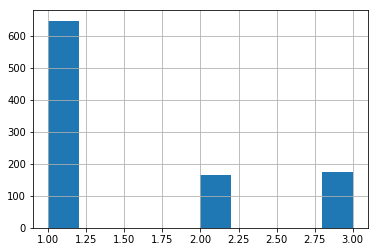

In [64]:
old_males.cholesterol.hist()

In [69]:
s1 = old_males[(old_males.ap_hi  < 120) & (old_males.cholesterol == 1)]

In [71]:
s2 = old_males[(160 <= old_males.ap_hi) & (old_males.ap_hi  < 180) & (old_males.cholesterol == 3)]

In [75]:
print('s1', s1.cardio.mean())
print('s2', s2.cardio.mean())
print('ration', round(s2.cardio.mean()/s1.cardio.mean()))


s1 0.2631578947368421
s2 0.8636363636363636
ration 3.0


**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке превышает норму
- У женщин в среднем BMI ниже, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

In [12]:
df['bmi'] = df.weight/((df.height/100)**2)


In [24]:
df[df['bmi'] > 260]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
18218,19594,1,75,168.0,120,80,1,1,1,0,1,1,298.666667
32456,23386,1,55,81.0,130,90,1,1,0,0,1,1,267.768595
39156,15292,1,80,178.0,140,90,3,3,0,0,1,1,278.125000


In [13]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


1) Медианный BMI по выборке превышает норму - да

In [14]:
df.bmi.median()

26.374068120774975

2) У женщин в среднем BMI ниже, чем у мужчин - нет

In [87]:
df.groupby('gender')['bmi'].mean()

gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64

3) У здоровых в среднем BMI выше, чем у больных - нет

In [88]:
df.groupby('cardio')['bmi'].mean()

cardio
0    26.548175
1    28.566061
Name: bmi, dtype: float64

4) В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин - да

In [93]:
s3 = df[(df['cardio'] == 0) & ((df['alco'] == 0))]
s3.groupby('gender')['bmi'].mean()

gender
1    26.845407
2    25.872638
Name: bmi, dtype: float64

**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления строго выше верхнего
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используйте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Этот вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно, `round`) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

In [17]:
min_height = pd.Series.quantile(df.height, q = 0.025)
max_height = pd.Series.quantile(df.height, q = 0.975)

min_weight = pd.Series.quantile(df.weight, q = 0.025)
max_weight = pd.Series.quantile(df.weight, q = 0.975)

print(min_height, max_height, min_weight, max_weight)

150.0 180.0 51.0 108.0


In [18]:
s4 = df[~((df.ap_lo > df.ap_hi) | (df.height < min_height) | (df.height > max_height) | (df.weight < min_weight) \
   | (df.weight > max_weight))]

In [20]:
round(((df.shape[0] - s4.shape[0])/df.shape[0])*100)

10

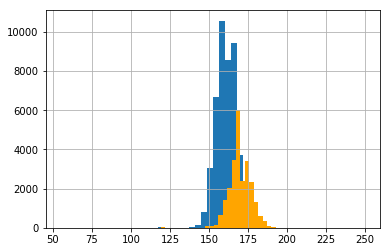

In [124]:
df[df['gender']==1].height.hist(bins=50)
df[df['gender']==2].height.hist(color='orange', bins=50)

In [125]:
import seaborn as sns

In [ ]:
pd.scatter_matrix(df)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cc4a8f4a8>,
      dtype=object)

In [137]:
a = [1,2,3] + [4,5,6]
a

[1, 2, 3, 4, 5, 6]

In [140]:
a = np.array([1,2,3]) + np.array([1,2,3])

In [152]:
a = np.array([1, 2, 3, 4, 5, 6])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12712f5dd8>,
      dtype=object)

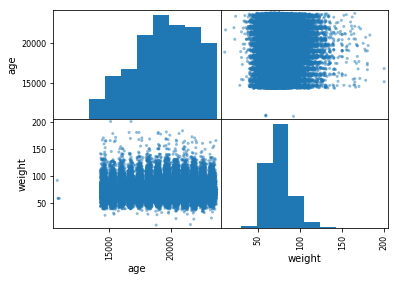

In [10]:
pd.scatter_matrix(df[['age','weight']])

In [9]:
df['age'].min()/365

29.583561643835615